In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()
X, y = iris.data, iris.target

In [3]:
column_name = iris.feature_names

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
import pandas as pd
X_df = pd.DataFrame(X, columns=column_name)
X_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [7]:
import matplotlib.pyplot as plt

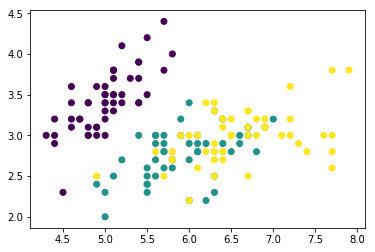

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#### parameter
1) max_depth: 최대 깊이 of tree  
2) min_samples_leaf: leaf node의 최소 data 개수  
3) max_features: 매 분기때마다 고려하는 feature의 수

In [9]:
for depth in range(1, 6):
    model = DecisionTreeClassifier(criterion='entropy', max_depth=depth, min_samples_leaf=3,
                                                      max_features="sqrt", random_state=0)
    #max_features = sqrt -> 전체 feature개수의 square root만큼 feature 수를 결정
    model_tree = model.fit(X_train, y_train)
    print('Depth:', depth, end=' -> ')
    print("Trainset accuracy:{:.4f}".format(model_tree.score(X_train, y_train)), end=' / ')
    print("Testset accuracy:{:.4f}".format(model_tree.score(X_test, y_test)))


Depth: 1 -> Trainset accuracy:0.6667 / Testset accuracy:0.6667
Depth: 2 -> Trainset accuracy:0.9583 / Testset accuracy:0.9667
Depth: 3 -> Trainset accuracy:0.9583 / Testset accuracy:0.9667
Depth: 4 -> Trainset accuracy:0.9750 / Testset accuracy:0.9333
Depth: 5 -> Trainset accuracy:0.9750 / Testset accuracy:0.9333


In [10]:
#feature의 중요도
model_tree.feature_importances_

array([0.        , 0.03065944, 0.03540755, 0.93393302])

In [11]:
from sklearn.tree import export_graphviz

export_graphviz(model_tree, out_file="model_tree.dot", class_names=iris.target_names,
                           feature_names=iris.feature_names, filled=True)

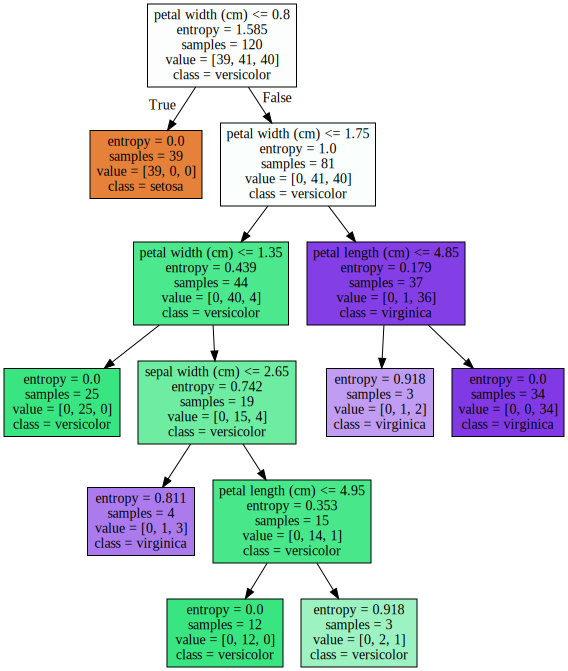

In [1]:
import graphviz
with open("model_tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))